## General Fire Incident Statistics

In [135]:
import time
import pytz
from dateutil import tz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sbn
from scipy import stats

In [136]:
# Importing the cleaned/combined data from the csv with the years 2008-2018

firefile = './output/all_with_no_incident_nulls.csv'
df = pd.read_csv(firefile, skip_blank_lines=True, encoding='UTF-8', low_memory=False)
len(df)
df.isna().sum()

GlobalID                         0
OBJECTID                         0
address                          0
address2                     61751
apt_room                     66107
arrive_date_time             29680
cleared_date_time                2
dispatch_date_time               0
exposure                         0
incident_number                  0
incident_type                    0
incident_type_description        0
platoon                          0
station                         36
Longitude                        0
Latitude                         0
Year                             0
Date                             0
dtype: int64

In [137]:
df['arrive_date_time'] = pd.to_datetime(df['arrive_date_time'])
df['cleared_date_time'] = pd.to_datetime(df['cleared_date_time'])
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])
df['Year'] = df['Year'].astype(float).map("{:.0f}".format)
df.dtypes

GlobalID                             object
OBJECTID                              int64
address                              object
address2                             object
apt_room                             object
arrive_date_time             datetime64[ns]
cleared_date_time            datetime64[ns]
dispatch_date_time           datetime64[ns]
exposure                              int64
incident_number                      object
incident_type                       float64
incident_type_description            object
platoon                              object
station                             float64
Longitude                           float64
Latitude                            float64
Year                                 object
Date                                 object
dtype: object

In [138]:
df.head()

,GlobalID,OBJECTID,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date
0,eb6f5e12-dec5-4f55-9746-d2867a13d9e6,474769,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,2013-10-19 21:52:00,2013-10-19 21:59:00,2013-10-19 21:47:00,0,13-0030918,150.0,Outside rubbish fire Other,B,22.0,-78.537320,35.891622,2013,2013-10-19
1,8df5e743-2b41-4b22-9012-6e8cbe9327e2,474770,"7513 IDOLBROOK LN RALEIGH, NC 27615",NaN,,2014-02-14 21:49:00,2014-02-14 21:51:00,2014-02-14 21:46:00,0,14-0004846,510.0,Person in distress Other,A,4.0,-78.647631,35.878186,2014,2014-02-14
2,907e5339-78fc-4873-90e2-94ae47f225e4,474771,"1205 S BLOODWORTH ST RALEIGH, NC 27601",NaN,,2012-04-29 05:17:00,2012-04-29 05:38:00,2012-04-29 05:16:00,0,12-0011779,440.0,Electrical wiring/equipment problem Other,A,1.0,-78.633977,35.765388,2012,2012-04-29
3,d86875b1-1b90-47cb-94fa-23031de9f995,474772,"7628 VALVIEW ST RALEIGH, NC 27601",NaN,,2012-04-28 23:46:00,2012-04-28 23:52:00,2012-04-28 23:43:00,0,12-9010131,561.0,Unauthorized burning,A,18.0,-78.691396,35.884447,2012,2012-04-28
4,507c4929-34a1-457f-80f2-3af654aea4fb,474773,"4201 MANGROVE DR RALEIGH, NC 27603",NaN,,2014-01-26 22:35:00,2014-01-26 22:38:00,2014-01-26 22:31:00,0,14-0002916,520.0,Water problem Other,B,28.0,-78.516560,35.872725,2014,2014-01-26


In [139]:
# Adding bins for later analysis

bins = [100, 199, 299, 499, 599, 699, 799, 899, 9999]
labels = ["Fire", "Overpressure Rupture/Explosion (No Fire)", "Hazardous Condition (No Fire)", "Service Call", "Good Intent Call", "False Alarm and False Call",
        "Severe Weather/Natural Disaster", "Special Incident Type"]
df["Incident"] = pd.cut(df["incident_type"], bins, labels=labels)
df.head()

,GlobalID,OBJECTID,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Incident
0,eb6f5e12-dec5-4f55-9746-d2867a13d9e6,474769,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,2013-10-19 21:52:00,2013-10-19 21:59:00,2013-10-19 21:47:00,0,13-0030918,150.0,Outside rubbish fire Other,B,22.0,-78.537320,35.891622,2013,2013-10-19,Fire
1,8df5e743-2b41-4b22-9012-6e8cbe9327e2,474770,"7513 IDOLBROOK LN RALEIGH, NC 27615",NaN,,2014-02-14 21:49:00,2014-02-14 21:51:00,2014-02-14 21:46:00,0,14-0004846,510.0,Person in distress Other,A,4.0,-78.647631,35.878186,2014,2014-02-14,Service Call
2,907e5339-78fc-4873-90e2-94ae47f225e4,474771,"1205 S BLOODWORTH ST RALEIGH, NC 27601",NaN,,2012-04-29 05:17:00,2012-04-29 05:38:00,2012-04-29 05:16:00,0,12-0011779,440.0,Electrical wiring/equipment problem Other,A,1.0,-78.633977,35.765388,2012,2012-04-29,Hazardous Condition (No Fire)
3,d86875b1-1b90-47cb-94fa-23031de9f995,474772,"7628 VALVIEW ST RALEIGH, NC 27601",NaN,,2012-04-28 23:46:00,2012-04-28 23:52:00,2012-04-28 23:43:00,0,12-9010131,561.0,Unauthorized burning,A,18.0,-78.691396,35.884447,2012,2012-04-28,Service Call
4,507c4929-34a1-457f-80f2-3af654aea4fb,474773,"4201 MANGROVE DR RALEIGH, NC 27603",NaN,,2014-01-26 22:35:00,2014-01-26 22:38:00,2014-01-26 22:31:00,0,14-0002916,520.0,Water problem Other,B,28.0,-78.516560,35.872725,2014,2014-01-26,Service Call


## Total fire incidents per year

In [140]:
df_year = df.groupby('Year')['OBJECTID'].count()
df_year

Year
2008    13705
2009    13026
2010    13531
2011    13893
2012    13607
2013    13943
2014    14415
2015    15068
2016    15643
2017    18051
2018    13541
Name: OBJECTID, dtype: int64

In [141]:
ymean = round(df_year.mean(),2)
ymed = round(df_year.median(),2)
sdev = round(df_year.std(),2)
serr = round(df_year.sem(),2)
message = f'Raleigh FD had a mean incident rate of {ymean} per year, median {ymed}, with a standard deviation of {sdev} and error {serr}'
print(message)

Raleigh FD had a mean incident rate of 14402.09 per year, median 13893.0, with a standard deviation of 1424.08 and error 429.38


In [142]:
ymax = df_year.max()
ymin = df_year.min()
message2 = f'The most incidents came in 2017 when there were {ymax}, the minimum in 2009 when there were {ymin}.'
print(message2)


The most incidents came in 2017 when there were 18051, the minimum in 2009 when there were 13026.


In [143]:
year_inc = df.groupby(['Year','Incident'])['OBJECTID'].count().unstack('Incident').fillna(0)
year_inc

Incident,Fire,Overpressure Rupture/Explosion (No Fire),Hazardous Condition (No Fire),Service Call,Good Intent Call,False Alarm and False Call,Severe Weather/Natural Disaster,Special Incident Type
Year,,,,,,,,
2008,1321,58,1200,2627,3391,4907,26,59
2009,1075,50,1186,2457,3610,4450,19,68
2010,1222,57,1303,2765,3562,4456,27,42
2011,1339,69,1371,2512,3853,4587,47,34
2012,1088,82,1278,2265,3923,4857,24,36
2013,1076,100,1206,2325,4272,4860,16,32
2014,1041,90,1184,2276,4401,5313,20,31
2015,1060,90,1305,2421,4581,5525,17,23
2016,1083,87,1459,2420,4843,5613,46,30


### Charting incident counts by year and type

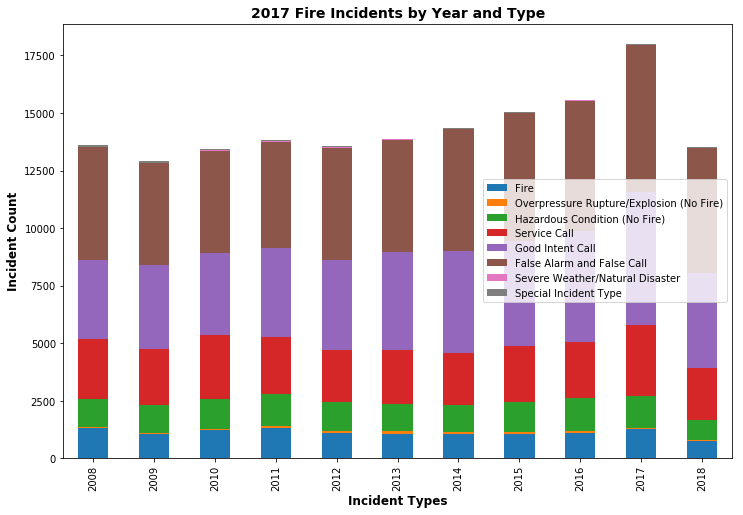

In [144]:
year_inc.plot(kind='bar', stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,3000)
fig.xlimit=(0,12)

# Add some labels and title
plt.xlabel('Incident Types', fontsize=12, fontweight='bold')
plt.ylabel('Incident Count', fontsize=12, fontweight='bold')
plt.title('2017 Fire Incidents by Year and Type', fontsize=14, fontweight='bold')
plt.legend(loc='best')
# Save the figure
# year_inc.plot(kind='bar', figsize=(10,8), use_index=True, title='Total Incidents per Year', grid=False,fontsize=12)
plt.savefig('./graphics/total_incidents_by_year.png')

In [162]:
df2 = df
df2['dispatch_date_time'] = df2['dispatch_date_time'].dt.tz_localize('US/Eastern', errors='coerce', ambiguous='NaT').dt.tz_convert('US/Central')

df2["Hour"] = pd.DatetimeIndex(df2['dispatch_date_time']).hour



TypeError: Already tz-aware, use tz_convert to convert.

In [163]:
hours = df2.groupby(['Hour','Incident'])['OBJECTID'].count().unstack('Incident').fillna(0)
hours

Incident,Fire,Overpressure Rupture/Explosion (No Fire),Hazardous Condition (No Fire),Service Call,Good Intent Call,False Alarm and False Call,Severe Weather/Natural Disaster,Special Incident Type
Hour,,,,,,,,
-5.0,575,26,695,1323,2063,2299,23,22
-4.0,505,29,533,1154,1962,1928,12,20
-3.0,400,26,444,965,1867,1751,11,15
-2.0,320,24,350,847,1635,1685,7,10
-1.0,254,10,272,668,1576,1427,4,6
0.0,262,12,241,607,1489,1297,5,7
1.0,233,8,193,522,1230,1177,6,13
2.0,213,12,195,457,1024,1165,7,1
3.0,188,10,174,435,871,1176,3,3


### Charting incidents by hour of day and type

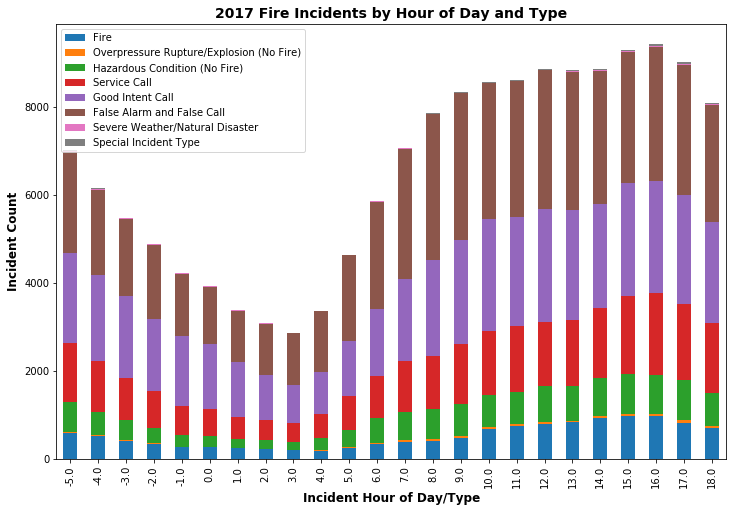

In [164]:
hours.plot(kind='bar', stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,3000)
fig.xlimit=(0,12)

# Add some labels and title
plt.xlabel('Incident Hour of Day/Type', fontsize=12, fontweight='bold')
plt.ylabel('Incident Count', fontsize=12, fontweight='bold')
plt.title('2017 Fire Incidents by Hour of Day and Type', fontsize=14, fontweight='bold')
plt.legend(loc='upper left')
# Save the figure
plt.savefig('./graphics/total_incidents_by_hour.png')


In [165]:
# Add a new column for month of the year
df["Month"] = pd.DatetimeIndex(df['dispatch_date_time']).month

In [148]:
# Group all incidents by the month of the year
months = df.groupby(['Month','Incident'])['OBJECTID'].count().unstack('Incident').fillna(0)
months

Incident,Fire,Overpressure Rupture/Explosion (No Fire),Hazardous Condition (No Fire),Service Call,Good Intent Call,False Alarm and False Call,Severe Weather/Natural Disaster,Special Incident Type
Month,,,,,,,,
1.0,1069.0,82.0,1292.0,2821.0,4181.0,5158.0,5.0,35.0
2.0,1081.0,66.0,1025.0,2162.0,3533.0,4010.0,8.0,28.0
3.0,1260.0,45.0,990.0,2181.0,3851.0,4140.0,4.0,36.0
4.0,1384.0,68.0,1153.0,2334.0,4110.0,4755.0,41.0,52.0
5.0,938.0,68.0,1166.0,2205.0,3788.0,4446.0,22.0,38.0
6.0,1033.0,52.0,1248.0,2202.0,3752.0,4789.0,41.0,32.0
7.0,1120.0,52.0,1320.0,2301.0,3985.0,5455.0,71.0,35.0
8.0,1014.0,67.0,1267.0,2367.0,4288.0,5657.0,30.0,35.0
9.0,798.0,60.0,1098.0,2261.0,3924.0,5030.0,19.0,23.0


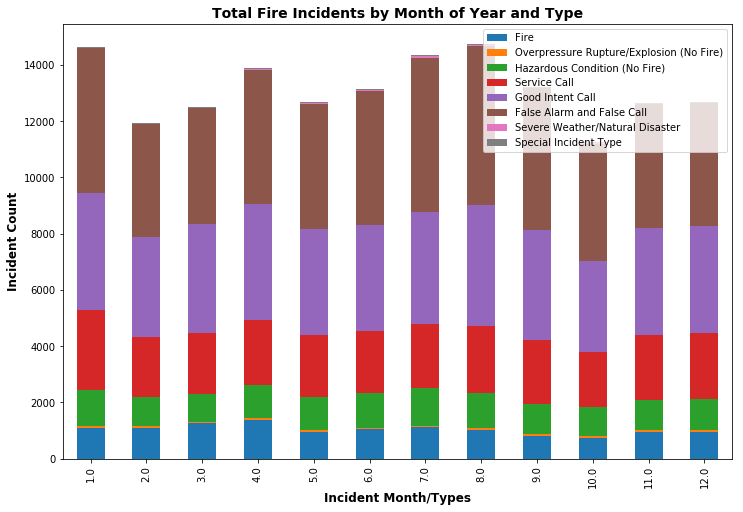

In [149]:
months.plot(kind='bar', stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,3000)
fig.xlimit=(0,12)

# Add some labels and title
plt.xlabel('Incident Month/Types', fontsize=12, fontweight='bold')
plt.ylabel('Incident Count', fontsize=12, fontweight='bold')
plt.title('Total Fire Incidents by Month of Year and Type', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
# Save the figure
plt.savefig('./graphics/total_incident_by_month.png')


### Focus in on 2017, highest number of calls

In [153]:
year2017 = df.loc[df['Year']=='2017']
len(year2017)

18051

In [154]:
year17 = year2017.groupby(['Month','Incident'])['OBJECTID'].count().unstack('Incident').fillna(0)
year17

Incident,Fire,Overpressure Rupture/Explosion (No Fire),Hazardous Condition (No Fire),Service Call,Good Intent Call,False Alarm and False Call,Severe Weather/Natural Disaster,Special Incident Type
Month,,,,,,,,
1.0,134.0,10.0,195.0,453.0,798.0,833.0,0.0,0.0
2.0,112.0,5.0,79.0,190.0,413.0,358.0,0.0,1.0
3.0,151.0,6.0,91.0,220.0,455.0,420.0,1.0,2.0
4.0,196.0,4.0,204.0,433.0,886.0,892.0,4.0,10.0
5.0,75.0,3.0,112.0,225.0,419.0,491.0,4.0,2.0
6.0,81.0,3.0,104.0,217.0,389.0,466.0,2.0,4.0
7.0,98.0,1.0,97.0,208.0,412.0,506.0,5.0,2.0
8.0,91.0,4.0,109.0,212.0,406.0,503.0,0.0,0.0
9.0,71.0,4.0,94.0,218.0,442.0,479.0,1.0,1.0


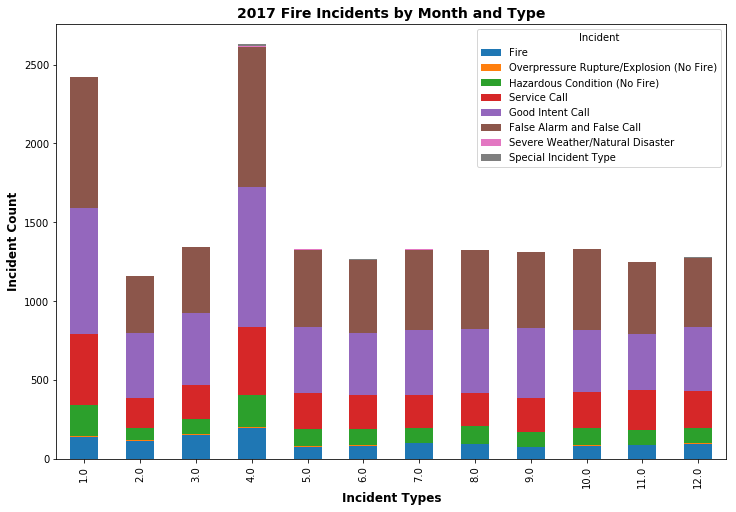

In [155]:
year17.plot(kind='bar', stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,3000)
fig.xlimit=(0,12)

# Add some labels and title
plt.xlabel('Incident Types', fontsize=12, fontweight='bold')
plt.ylabel('Incident Count', fontsize=12, fontweight='bold')
plt.title('2017 Fire Incidents by Month and Type', fontsize=14, fontweight='bold')
# Save the figure
plt.savefig('./graphics/2017_month_type_stacked.png')

## Focus in on fires

In [156]:
fires = df.loc[df['Incident']=='Fire']
len(fires)

12334

In [157]:
fire_mo = fires.groupby(['Year','Month'], sort=True)['OBJECTID'].count().unstack('Month').transpose()

fire_mo.sort_index(ascending=True)



Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Month,,,,,,,,,,,
1.0,103.0,82.0,91.0,92.0,103.0,87.0,98.0,74.0,89.0,134.0,116.0
2.0,133.0,118.0,67.0,146.0,90.0,67.0,84.0,107.0,87.0,112.0,70.0
3.0,145.0,104.0,135.0,114.0,98.0,139.0,109.0,88.0,98.0,151.0,79.0
4.0,118.0,119.0,124.0,117.0,107.0,123.0,135.0,105.0,141.0,196.0,99.0
5.0,109.0,83.0,88.0,86.0,78.0,91.0,88.0,106.0,69.0,75.0,65.0
6.0,121.0,97.0,83.0,142.0,115.0,77.0,70.0,100.0,79.0,81.0,68.0
7.0,110.0,101.0,132.0,161.0,97.0,73.0,101.0,105.0,68.0,98.0,74.0
8.0,116.0,72.0,85.0,112.0,78.0,77.0,64.0,200.0,68.0,91.0,51.0
9.0,75.0,63.0,133.0,78.0,70.0,77.0,74.0,42.0,70.0,71.0,45.0


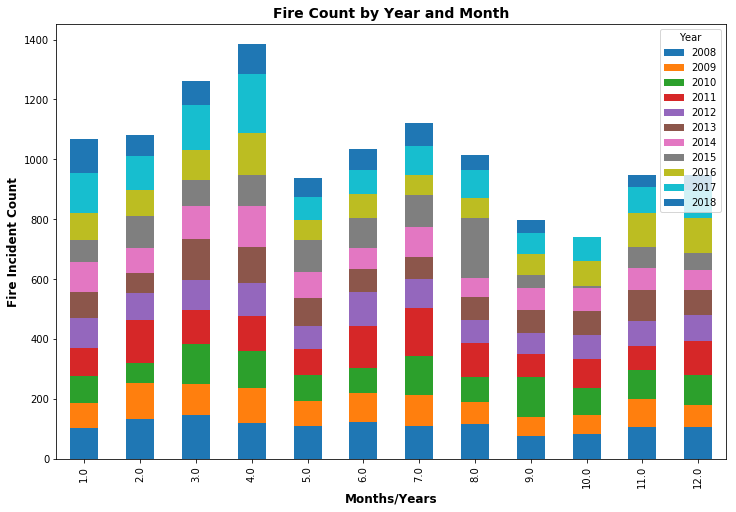

In [158]:
fire_mo.plot(kind='bar',stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,1000)
fig.xlimit=(0,30)

# Add some labels and title
plt.xlabel('Months/Years', fontsize=12, fontweight='bold')
plt.ylabel('Fire Incident Count', fontsize=12, fontweight='bold')
plt.title('Fire Count by Year and Month', fontsize=14, fontweight='bold')
# Save the figure
plt.savefig('./graphics/fires_by_year_month.png')


In [159]:
storms = df.loc[df['incident_type'] >= 800,:]

len(storms)

671

In [160]:
storms_mo = storms.groupby(['Year','Month'])['OBJECTID'].count().unstack('Month').fillna(0).transpose()

storms_mo

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Month,,,,,,,,,,,
1.0,5.0,12.0,4.0,1.0,7.0,1.0,7.0,1.0,2.0,0.0,0.0
2.0,4.0,7.0,2.0,4.0,1.0,2.0,1.0,8.0,3.0,1.0,3.0
3.0,11.0,6.0,5.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0
4.0,10.0,8.0,3.0,28.0,2.0,6.0,10.0,6.0,6.0,14.0,0.0
5.0,6.0,12.0,9.0,5.0,3.0,2.0,5.0,3.0,5.0,6.0,4.0
6.0,9.0,7.0,5.0,9.0,3.0,10.0,7.0,8.0,8.0,6.0,1.0
7.0,14.0,14.0,17.0,6.0,17.0,7.0,4.0,5.0,14.0,7.0,1.0
8.0,9.0,3.0,7.0,15.0,7.0,6.0,6.0,4.0,6.0,0.0,2.0
9.0,4.0,2.0,5.0,3.0,9.0,5.0,1.0,2.0,4.0,2.0,5.0


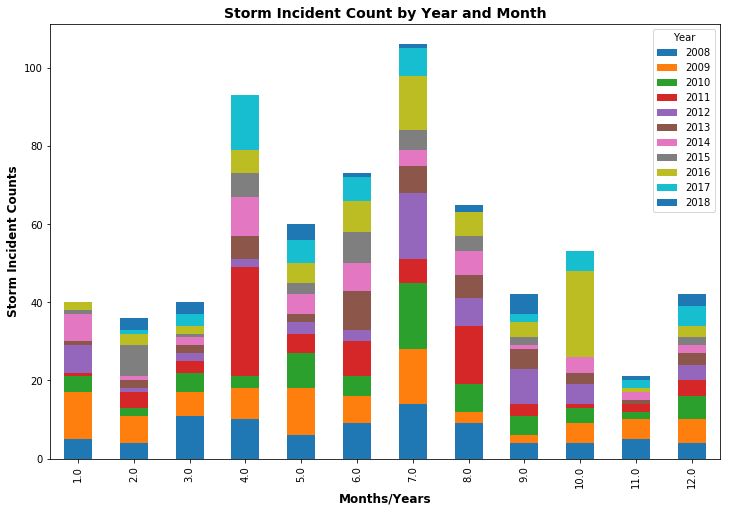

In [161]:
storms_mo.plot(kind='bar',stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,1000)
fig.xlimit=(0,30)

# Add some labels and title
plt.xlabel('Months/Years', fontsize=12, fontweight='bold')
plt.ylabel('Storm Incident Counts', fontsize=12, fontweight='bold')
plt.title('Storm Incident Count by Year and Month', fontsize=14, fontweight='bold')
# Save the figure
plt.savefig('./graphics/storms_by_year_month.png')

### Fire incidents analysis
- Fire incidents have been on the rise in Raleigh over the period of study
- Raleigh FD had a mean incident rate of 14402.09 per year, median 13893.0, with a standard deviation of 1424.08 and error 429.38
- The most incidents came in 2017 when there were 18051, the minimum in 2009 when there were 13026.
- There is a lull in non-EMS incidents from midnight to 9am, then incident counts rise through midnight.
- January and August generally have the most incidents, October has the lowest.
- When looking at only fires (codes 100-199) there doesn't seem to be a pattern by month, even though one might expect peaks around Christmas, or 4th of July.
- When looking at only storm incidents, there were a few major events visible: 
    - In April 2011 there was a tornado outbreak
    - In August 2011 Hurricane Irene 
    - In October 2016 Hurricane Matthew
    - In April 2017 there was record rainfall
    - 2018 data may be incomplete in this dataset, but there was a visible impact of Hurricane Florence in September or the snowfall in December.
- July and April are generally the biggest months for storm incidents.